In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_us = df[df['job_country'] == 'United States']
df_skills = df_us.explode('job_skills')
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [3]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

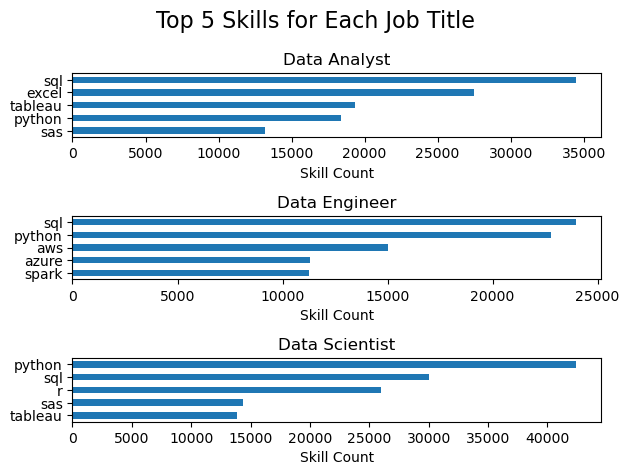

In [4]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], legend=False)
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('Skill Count')
    ax[i].set_ylabel('')
fig.suptitle('Top 5 Skills for Each Job Title', fontsize=16)

plt.tight_layout()
plt.show()
    

In [5]:
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [6]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [7]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['skills_percent'] = df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] * 100
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skills_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


/tmp/ipykernel_9151/2923018437.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='skills_percent', y='job_skills', ax=ax[i], palette='dark:b')
/tmp/ipykernel_9151/2923018437.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='skills_percent', y='job_skills', ax=ax[i], palette='dark:b')
/tmp/ipykernel_9151/2923018437.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='skills_percent', y='job_skills', ax=ax[i], palette='dark:b')


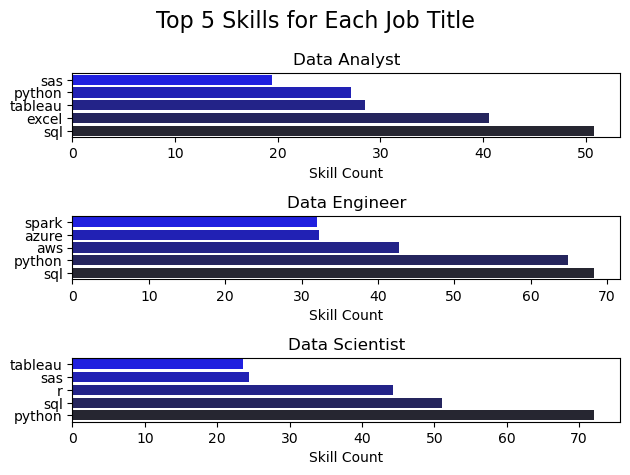

In [8]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skills_percent', ax=ax[i], legend=False)
    sns.barplot(data=df_plot, x='skills_percent', y='job_skills', ax=ax[i], palette='dark:b')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('Skill Count')
    ax[i].set_ylabel('')
fig.suptitle('Top 5 Skills for Each Job Title', fontsize=16)

plt.tight_layout()
plt.show()

/tmp/ipykernel_9151/4147793105.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_9151/4147793105.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_9151/4147793105.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


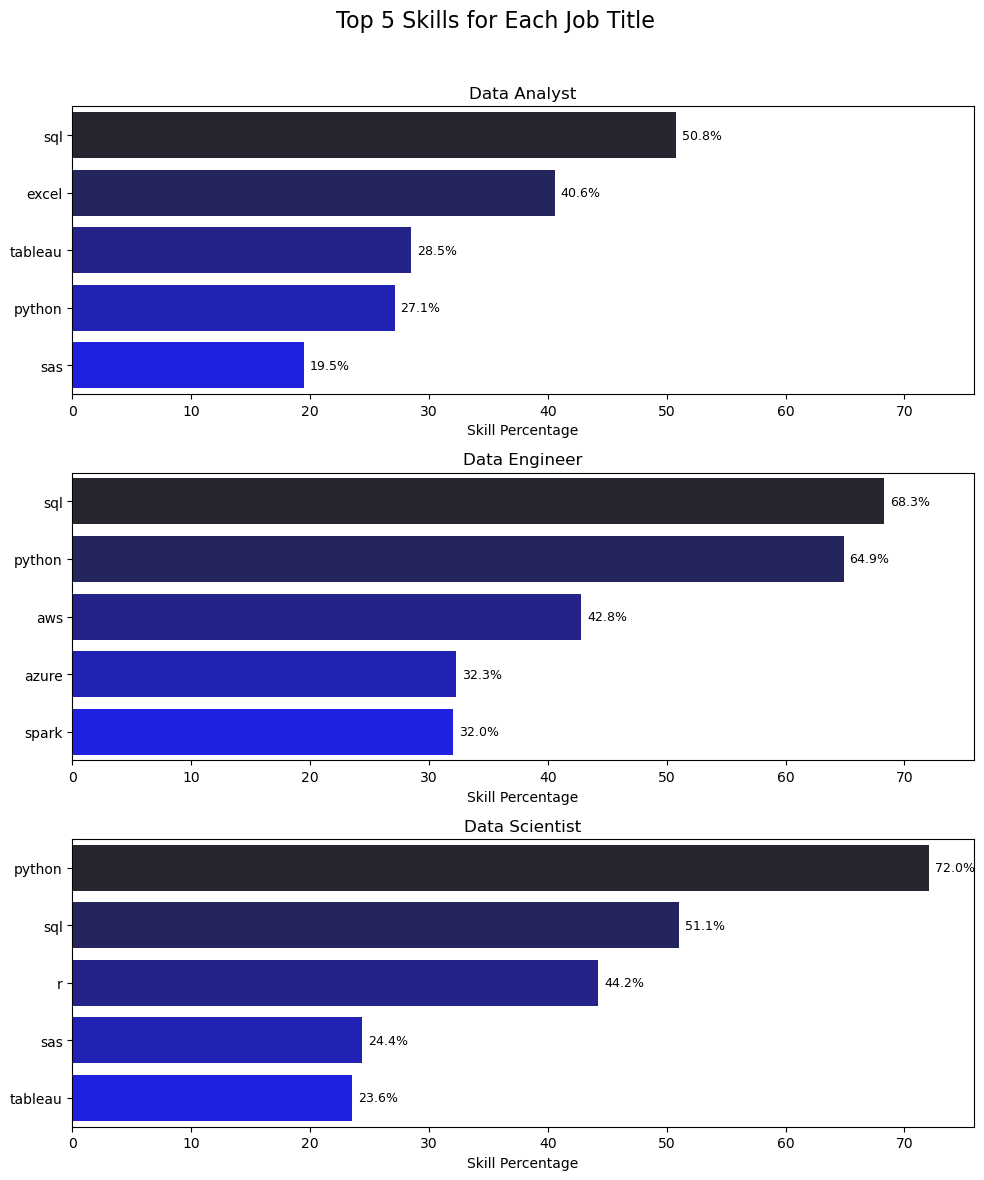

In [13]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, 4 * len(job_titles)))

if len(job_titles) == 1:
    ax = [ax]

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    
    # ✅ Sort so top skill is at the top
    df_plot = df_plot.sort_values('skills_percent', ascending=False)

    sns.barplot(
        data=df_plot,
        x='skills_percent',
        y='job_skills',
        ax=ax[i],
        palette='dark:b',
        legend=False
    )

    ax[i].set_title(job_title)
    ax[i].set_xlabel('Skill Percentage')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, df_skills_perc['skills_percent'].max())


    # 🏷️ Add percentage text next to each bar
    for index, value in enumerate(df_plot['skills_percent']):
        skill = df_plot['job_skills'].values[index]
        ax[i].text(value + 0.5, index, f'{value:.1f}%', va='center', fontsize=9, color='black')

fig.suptitle('Top 5 Skills for Each Job Title', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
import os

os.makedirs("images", exist_ok=True)
plt.savefig("images/top_skills.png", dpi=300, bbox_inches='tight')

plt.show()